# PyOpenCAP tutorial
In this tutorial we, post process results from Q-Chem calculations to analyze eigenvalue trajectories for CAP/EOM-CC and CAP-ADC calculations on the ${}^2\Pi_g$ shape resonance of $N_2^-$. We use the pyopencap.analysis submodule to extract the matrices and analyze the trajectories.

In [1]:
from pyopencap.analysis import CAPHamiltonian
import matplotlib.pyplot as plt
import numpy as np

## EOM-CC
There are two options for running projected CAP-EOM-CC calculations in Q-Chem. Starting from Q-Chem 5.4, the method is implented natively using the PROJ_CAP=3 keyword in complex_ccman. PyOpenCAP is capable of performing analysis directly from outputs generated by this calculation. Alternatively, one can export the one particle densities using the CC_TRANS_PROP=3 and STATE_ANALYSIS=1 keywords. The latter can be analyzed using OpenCAP, and the OpenCAP output can be fed into the CAPHamiltonian object.

In [3]:
CAPH = CAPHamiltonian(qchem_output="ref_outputs/eomcc.out",irrep="B2g")
# OpenCAP output
CAPH = CAPHamiltonian(opencap_output="ref_outputs/n2_opencap.out")
# Q-Chem output, can specify irrep using irrep kwarg

In [6]:
eta_list = np.linspace(0,3000,101)
eta_list = eta_list * 1E-5
CAPH.run_trajectory(eta_list)

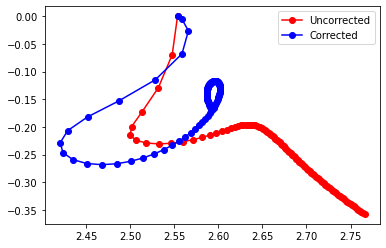

In [7]:
# ccsd energy of neutral
ref_energy = -109.36195558
traj = CAPH.track_state(1,tracking="overlap")
uc_energies = traj.energies_ev(ref_energy=ref_energy)
corr_energies = traj.energies_ev(ref_energy=ref_energy,corrected=True)
plt.plot(np.real(uc_energies),np.imag(uc_energies),'-ro',label="Uncorrected")
plt.plot(np.real(corr_energies),np.imag(corr_energies),'-bo',label="Corrected")
plt.legend()
plt.show()

Uncorrected:
(2.6381090019962823-0.19603033993453703j)
0.007500000000000001
Corrected:
(2.5963343630186184-0.11691520330421822j)
0.016800000000000002


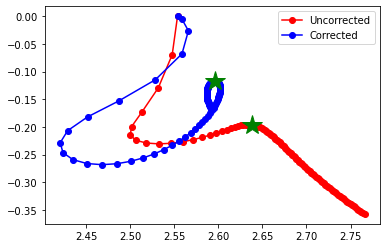

In [8]:
# Find optimal value of eta
uc_energy, eta_opt = traj.find_eta_opt(start_idx=10)
uc_energy = (uc_energy-ref_energy)*27.2114
corr_energy, corr_eta_opt = traj.find_eta_opt(corrected=True,start_idx=10)
corr_energy = (corr_energy-ref_energy)*27.2114
print("Uncorrected:")
print(uc_energy)
print(eta_opt)
print("Corrected:")
print(corr_energy)
print(corr_eta_opt)
plt.plot(np.real(uc_energies),np.imag(uc_energies),'-ro',label="Uncorrected")
plt.plot(np.real(corr_energies),np.imag(corr_energies),'-bo',label="Corrected")
plt.plot(np.real(uc_energy),np.imag(uc_energy),'g*',markersize=20)
plt.plot(np.real(corr_energy),np.imag(corr_energy),'g*',markersize=20)
plt.legend()
plt.show()

## ADC

Starting from Q-Chem 5.4, CAP-ADC calculations can be performed using the ADC_CAP keyword. PyOpenCAP is capable of performing analysis directly from outputs generated by this calculation, either in the form of .data files or the Q-Chem output file. Here, we a analyze CAP-EA-ADC(2) calculation.

In [11]:
# Q-Chem output, specify onset for Voronoi CAPs using onset kwarg
CAPH = CAPHamiltonian(qchem_output="ref_outputs/adc.out", onset="3000")
# .data files generated by Q-Chem
CAPH = CAPHamiltonian(h0_data="ref_outputs/cap_adc_ea_hamil.data",W_data="ref_outputs/cap_adc_ea_im_3000.data")

In [16]:
eta_list = np.linspace(0,3000,101)
eta_list = eta_list * 1E-5
CAPH.run_trajectory(eta_list)

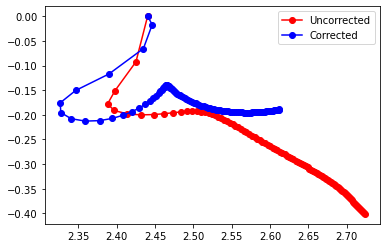

In [22]:
# energies in hamiltonian are excitation energies rather than total energies, so ref_energy=0 is appropriate ehre
traj = CAPH.track_state(1,tracking="overlap")
uc_energies = traj.energies_ev(ref_energy=0.0)
corr_energies = traj.energies_ev(ref_energy=0.0,corrected=True)
plt.plot(np.real(uc_energies),np.imag(uc_energies),'-ro',label="Uncorrected")
plt.plot(np.real(corr_energies),np.imag(corr_energies),'-bo',label="Corrected")
plt.legend()
plt.show()

Uncorrected:
(2.5101940307003714-0.19385942929856684j)
0.004200000000000001
Corrected:
(2.465344604107427-0.13990054677469257j)
0.008100000000000001


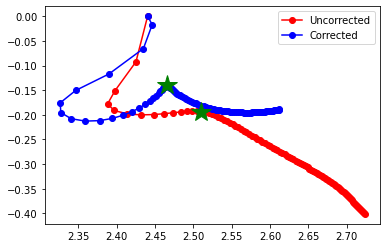

In [25]:
# Find optimal value of eta
uc_energy, eta_opt = traj.find_eta_opt(start_idx=10)
uc_energy = uc_energy*27.2114
corr_energy, corr_eta_opt = traj.find_eta_opt(corrected=True,start_idx=10)
corr_energy = corr_energy*27.2114
print("Uncorrected:")
print(uc_energy)
print(eta_opt)
print("Corrected:")
print(corr_energy)
print(corr_eta_opt)
plt.plot(np.real(uc_energies),np.imag(uc_energies),'-ro',label="Uncorrected")
plt.plot(np.real(corr_energies),np.imag(corr_energies),'-bo',label="Corrected")
plt.plot(np.real(uc_energy),np.imag(uc_energy),'g*',markersize=20)
plt.plot(np.real(corr_energy),np.imag(corr_energy),'g*',markersize=20)
plt.legend()
plt.show()